In [17]:
import pandas as pd
import re

# Read the CSV file
df = pd.read_csv('..//data//inaturalist_boletus_edulis_with_corine_climate_topography.csv')
rain_columns = [f'P_{i}' for i in range(1, 15) if f'P_{i}' in df.columns]

df.head()

,Unnamed: 0,species,location,observed_on,y,x,LC,P_1,P_2,P_3,...,Tmin_9,Tmin_10,Tmin_11,Tmin_12,Tmin_13,Tmin_14,dem,slope,aspect,geomorphon
0,3609,Boletus edulis,"(43.1119576925, 1.2274287587)",2022-12-09 11:31:00+01:00,43.111958,1.227429,24.0,9.966915,0.978948,1.146052,...,24.504308,24.471695,24.355530,24.668030,24.090586,24.206751,461.0,11.997304,7.997421,7.0
1,3608,Boletus edulis,"(43.1121818071, 1.2249231333)",2022-12-09 11:02:00+01:00,43.112182,1.224923,24.0,9.960307,0.977968,1.147032,...,24.502041,24.469988,24.353403,24.665903,24.088179,24.204765,469.0,6.478467,3.732119,7.0
2,482,Boletus edulis,"(48.7929881052, 2.0979980752)",2023-11-18 16:37:00+01:00,48.792988,2.097998,23.0,9.924997,3.664999,0.437500,...,26.062500,26.312500,25.905000,26.125000,26.127500,26.217500,183.0,2.357576,156.553619,6.0
3,482,Boletus edulis,"(48.7929881052, 2.0979980752)",2023-11-18 16:37:00+01:00,48.792988,2.097998,23.0,9.924997,3.664999,0.437500,...,26.062500,26.312500,25.905000,26.125000,26.127500,26.217500,183.0,2.357576,156.553619,6.0
4,482,Boletus edulis,"(48.7929881052, 2.0979980752)",2023-11-18 16:37:00+01:00,48.792988,2.097998,23.0,9.924997,3.664999,0.437500,...,26.062500,26.312500,25.905000,26.125000,26.127500,26.217500,183.0,2.357576,156.553619,6.0


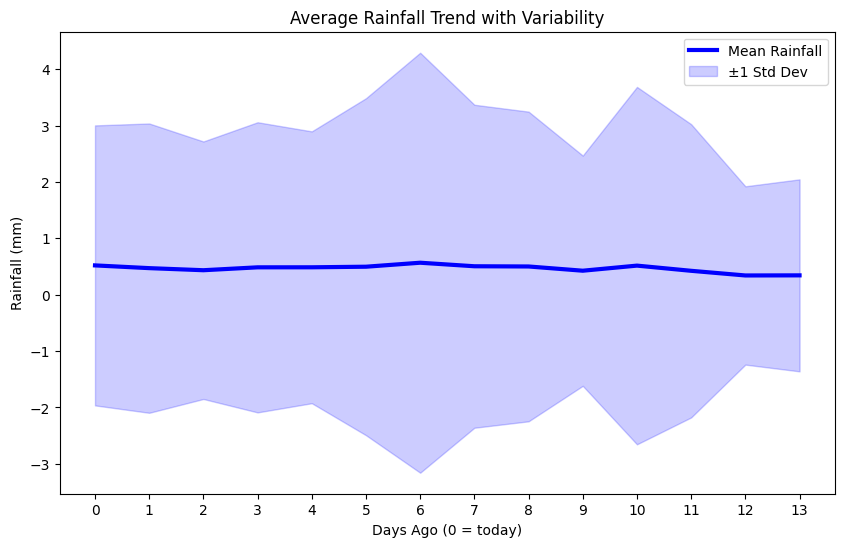

In [5]:
import matplotlib.pyplot as plt

mean_rain = df[rain_columns].mean()
std_rain = df[rain_columns].std()

plt.figure(figsize=(10,6))
plt.plot(mean_rain.index, mean_rain.values, color="blue", linewidth=3, label="Mean Rainfall")
plt.fill_between(mean_rain.index, 
                 mean_rain - std_rain, 
                 mean_rain + std_rain, 
                 color="blue", alpha=0.2, label="±1 Std Dev")

plt.xticks(range(len(rain_columns)), labels=[str(i) for i in range(len(rain_columns))])
plt.xlabel("Days Ago (0 = today)")
plt.ylabel("Rainfall (mm)")
plt.title("Average Rainfall Trend with Variability")
plt.legend()
plt.show()


C:\Users\ferli\AppData\Local\Temp\ipykernel_56184\985156741.py:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.lineplot(


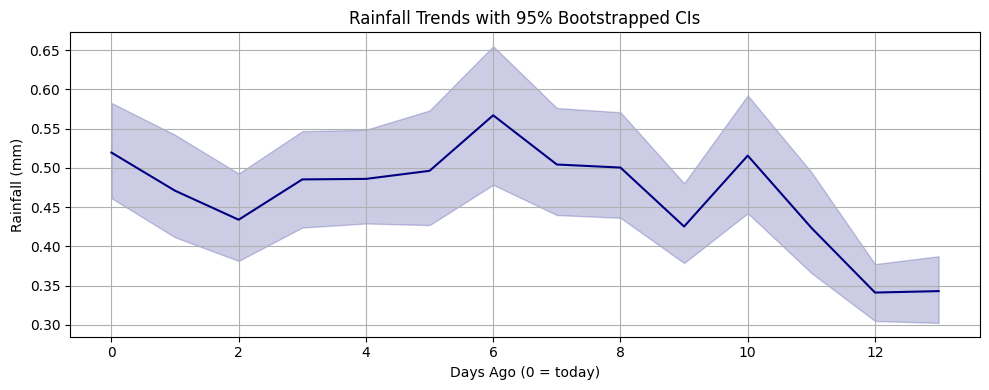

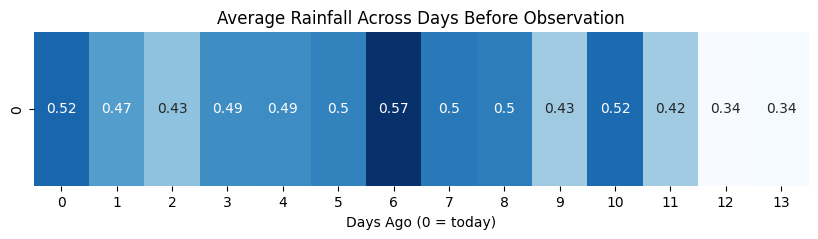

C:\Users\ferli\AppData\Local\Temp\ipykernel_56184\985156741.py:51: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.lineplot(


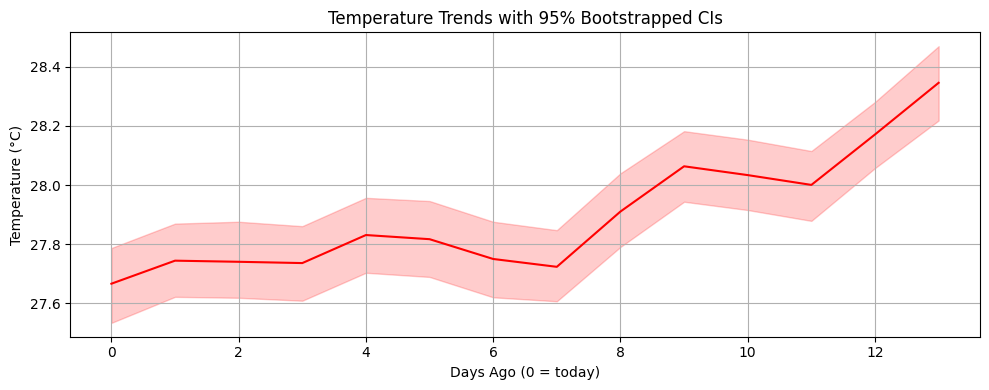

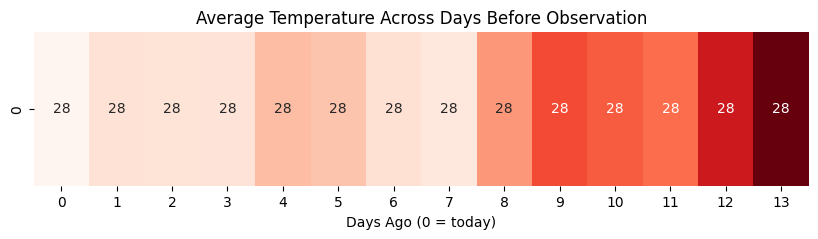

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define rain columns
rain_columns = [f'P_{i}' for i in range(1, 15) if f'P_{i}' in df.columns]

# Reshape dataframe into long format
df_long = df[rain_columns].melt(var_name="Day", value_name="Rain")
df_long["Day"] = df_long["Day"].str.extract("(\d+)").astype(int) - 1  # P1->0, P2->1...

# Plot with seaborn
plt.figure(figsize=(10,4))
sns.lineplot(
    data=df_long, x="Day", y="Rain",
    ci=95, n_boot=1000,  # bootstrap CI handled automatically
    color="navy"
)
plt.xlabel("Days Ago (0 = today)")
plt.ylabel("Rainfall (mm)")
plt.title("Rainfall Trends with 95% Bootstrapped CIs")
plt.grid()
plt.tight_layout()
plt.show()


import numpy as np

plt.figure(figsize=(10,2))
sns.heatmap([df[rain_columns].mean().values], 
            cmap="Blues", annot=True, cbar=False,
            xticklabels=[str(i) for i in range(len(rain_columns))])
plt.xlabel("Days Ago (0 = today)")
plt.title("Average Rainfall Across Days Before Observation")
plt.show()

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Define rain and temp columns
temp_columns = [f'Temp_{i}' for i in range(1, 15) if f'Temp_{i}' in df.columns]


# Reshape temp data
df_temp_long = df[temp_columns].melt(var_name="Day", value_name="Temp")
df_temp_long["Day"] = df_temp_long["Day"].str.extract("(\d+)").astype(int) - 1


# --- Temperature plot ---
plt.figure(figsize=(10,4))
sns.lineplot(
    data=df_temp_long, x="Day", y="Temp",
    ci=95, n_boot=1000, color="red"
)
plt.xlabel("Days Ago (0 = today)")
plt.ylabel("Temperature (°C)")
plt.title("Temperature Trends with 95% Bootstrapped CIs")
plt.grid()
plt.tight_layout()
plt.show()

# --- Temperature heatmap ---
plt.figure(figsize=(10,2))
sns.heatmap([df[temp_columns].mean().values],
            cmap="Reds", annot=True, cbar=False,
            xticklabels=[str(i) for i in range(len(temp_columns))])
plt.xlabel("Days Ago (0 = today)")
plt.title("Average Temperature Across Days Before Observation")
plt.show()


In [20]:
import pandas as pd
import re

# Read the CSV file
df = pd.read_csv('..//data//negative_samples_within_land_10k_with_coords_topography_climate.csv')
rain_columns = [f'P_{i}' for i in range(1, 15) if f'P_{i}' in df.columns]

df.head()

,species,location,observed_on,y,x,dem,dem_source,slope,aspect,geomorphon,...,Tmin_5,Tmin_6,Tmin_7,Tmin_8,Tmin_9,Tmin_10,Tmin_11,Tmin_12,Tmin_13,Tmin_14
0,NaN,"(13.163340337149009, -88.25423130281905)",12/30/2020 0:00,13.163340,-88.254231,0,Local,0.0,-1.0,NaN,...,22.224980,23.347685,23.045820,24.847685,24.045820,23.162480,23.160185,23.295820,24.097685,24.358320
1,NaN,"(49.17689378736043, -55.26809118565663)",7/24/2009 0:00,49.176894,-55.268091,0,Local,0.0,-1.0,NaN,...,16.502768,11.090344,11.590344,12.340344,13.451577,13.190268,14.440268,13.315268,14.315268,11.277844
2,NaN,"(-39.65447416944546, -73.4216893732224)",5/16/2019 0:00,-39.654474,-73.421689,0,Local,0.0,-1.0,NaN,...,12.833846,11.630596,9.677709,9.818096,9.085789,9.696554,10.249631,12.041831,12.188848,12.300101
3,NaN,"(-31.302668645675077, -51.40285597120129)",6/15/2003 0:00,-31.302669,-51.402856,0,Local,0.0,-1.0,NaN,...,15.095536,15.963391,13.095536,11.989282,13.599109,15.433927,16.158036,14.444645,15.444645,17.283036
4,NaN,"(19.930240437665447, -76.09117247450952)",12/22/2023 0:00,19.930240,-76.091172,0,Local,0.0,-1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


C:\Users\ferli\AppData\Local\Temp\ipykernel_56184\985156741.py:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.lineplot(


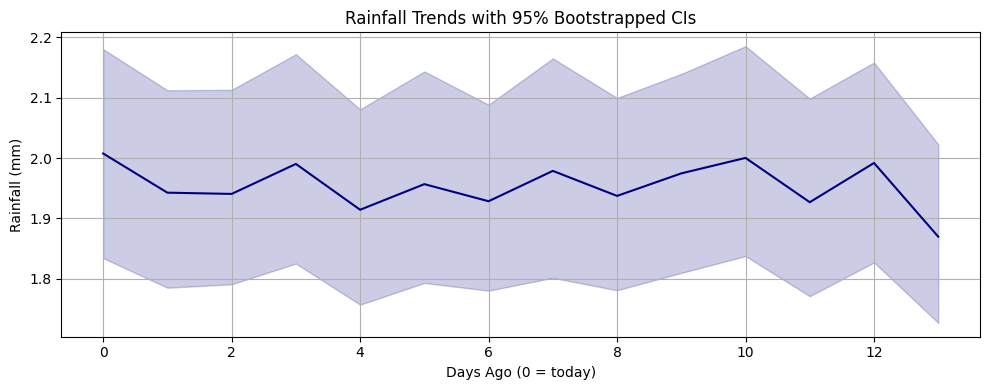

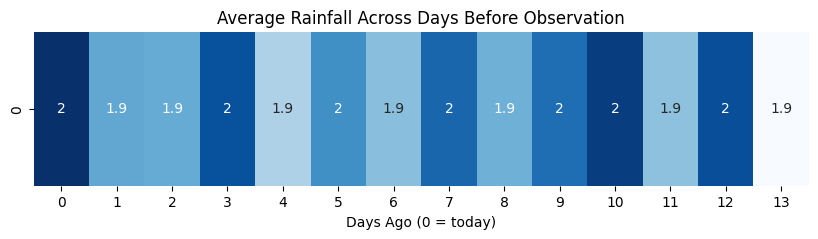

C:\Users\ferli\AppData\Local\Temp\ipykernel_56184\985156741.py:51: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.lineplot(


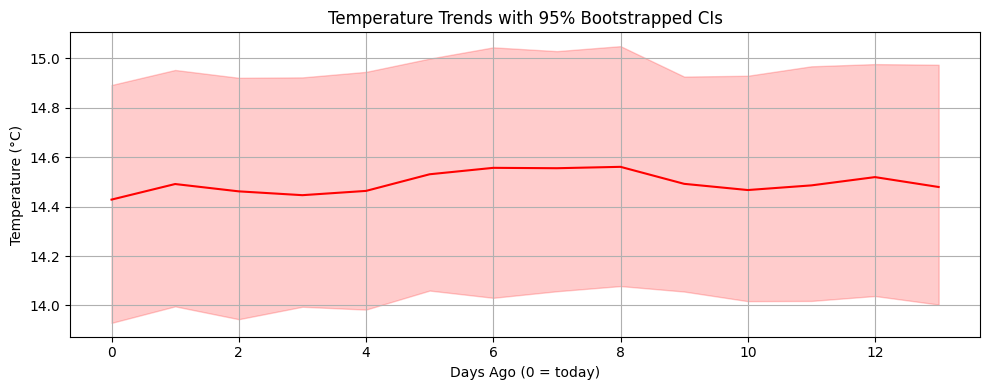

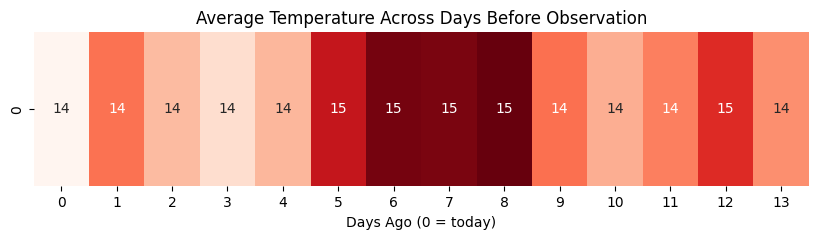

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define rain columns
rain_columns = [f'P_{i}' for i in range(1, 15) if f'P_{i}' in df.columns]

# Reshape dataframe into long format
df_long = df[rain_columns].melt(var_name="Day", value_name="Rain")
df_long["Day"] = df_long["Day"].str.extract("(\d+)").astype(int) - 1  # P1->0, P2->1...

# Plot with seaborn
plt.figure(figsize=(10,4))
sns.lineplot(
    data=df_long, x="Day", y="Rain",
    ci=95, n_boot=1000,  # bootstrap CI handled automatically
    color="navy"
)
plt.xlabel("Days Ago (0 = today)")
plt.ylabel("Rainfall (mm)")
plt.title("Rainfall Trends with 95% Bootstrapped CIs")
plt.grid()
plt.tight_layout()
plt.show()


import numpy as np

plt.figure(figsize=(10,2))
sns.heatmap([df[rain_columns].mean().values], 
            cmap="Blues", annot=True, cbar=False,
            xticklabels=[str(i) for i in range(len(rain_columns))])
plt.xlabel("Days Ago (0 = today)")
plt.title("Average Rainfall Across Days Before Observation")
plt.show()

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Define rain and temp columns
temp_columns = [f'Temp_{i}' for i in range(1, 15) if f'Temp_{i}' in df.columns]


# Reshape temp data
df_temp_long = df[temp_columns].melt(var_name="Day", value_name="Temp")
df_temp_long["Day"] = df_temp_long["Day"].str.extract("(\d+)").astype(int) - 1


# --- Temperature plot ---
plt.figure(figsize=(10,4))
sns.lineplot(
    data=df_temp_long, x="Day", y="Temp",
    ci=95, n_boot=1000, color="red"
)
plt.xlabel("Days Ago (0 = today)")
plt.ylabel("Temperature (°C)")
plt.title("Temperature Trends with 95% Bootstrapped CIs")
plt.grid()
plt.tight_layout()
plt.show()

# --- Temperature heatmap ---
plt.figure(figsize=(10,2))
sns.heatmap([df[temp_columns].mean().values],
            cmap="Reds", annot=True, cbar=False,
            xticklabels=[str(i) for i in range(len(temp_columns))])
plt.xlabel("Days Ago (0 = today)")
plt.title("Average Temperature Across Days Before Observation")
plt.show()


# Append variables for inference (on vector file)

In [ ]:
import pandas as pd
import re

# Read the CSV file
df = pd.read_csv('data/negative_samples_within_land_10k.csv')

# Function to extract coordinates from the location string
def parse_coordinates(location_str):
    # Check if the value is NaN or not a string
    if pd.isna(location_str) or not isinstance(location_str, str):
        return None, None
    
    # Use regex to extract numbers from the string format "(lat, lon)"
    match = re.search(r'\(([^,]+),\s*([^)]+)\)', location_str)
    if match:
        try:
            lat = float(match.group(1).strip())
            lon = float(match.group(2).strip())
            return lat, lon
        except ValueError:
            return None, None
    else:
        return None, None

# Extract coordinates into separate columns
df[['y', 'x']] = df['location'].apply(lambda x: pd.Series(parse_coordinates(x)))

# Optional: Remove the original location column if you don't need it
# df = df.drop('location', axis=1)

# Save the new CSV with coordinate columns
df.to_csv('data/negative_samples_within_land_10k_with_coords.csv', index=False)

print("CSV file saved with separate x and y coordinate columns!")
print(f"Total rows processed: {len(df)}")
print(f"Rows with valid coordinates: {df[['x', 'y']].dropna().shape[0]}")
print(f"Rows with missing coordinates: {df[['x', 'y']].isna().any(axis=1).sum()}")
print("\nFirst few rows with new columns:")
print(df[['species', 'x', 'y', 'observed_on']].head())

In [ ]:
import pandas as pd

# Read the CSV file into a DataFrame
df = pd.read_csv('negative_samples_within_polygons_updated.csv')

df["species"] = "None"
# Remove rows containing NaN values
df_cleaned = df.dropna()

# If you want to reset the index after dropping rows
df_cleaned.reset_index(drop=True, inplace=True)

# Print the cleaned DataFrame
print(df_cleaned)


In [ ]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point, Polygon

# Load the GeoJSON file containing the polygon of Spain
spain_polygon = gpd.read_file('spain.geojson')

# Load the CSV file into a DataFrame
df = df_cleaned

# Extract latitude and longitude from the "location" column
df[['latitude', 'longitude']] = df['location'].str.extract(r'\(([^,]+),([^)]+)\)').astype(float)

# Drop the original "location" column
df.drop(columns=['location'], inplace=True)

# Convert the DataFrame to a GeoDataFrame
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.longitude, df.latitude))

# Ensure that both GeoDataFrames have the same CRS (Coordinate Reference System)
gdf.crs = spain_polygon.crs

# Perform a spatial join to keep only the points inside the polygon
points_inside_polygon = gpd.sjoin(gdf, spain_polygon, op='within')

# Drop unnecessary columns added during the join
points_inside_polygon.drop(columns=['index_right'], inplace=True)
points_inside_polygon
# Save the filtered points to a new CSV file
#points_inside_polygon.to_csv('points_inside_spain.csv', index=False)


In [ ]:
import matplotlib.pyplot as plt

# Define the variables to plot
variables_to_plot = ['P', 'Tmin', 'Temp', 'RelHum', 'SpecHum', 'Pres', 'Tmax']

# Aggregate the data across the 14 columns for each variable
aggregated_data = {}
for var in variables_to_plot:
    aggregated_data[var] = points_inside_polygon[[f'{var}_{i}' for i in range(1, 15)]].mean(axis=1)

# Plotting
fig, axs = plt.subplots(len(variables_to_plot), 1, figsize=(10, 6 * len(variables_to_plot)))
for i, var in enumerate(variables_to_plot):
    ax = axs[i]
    ax.hist(aggregated_data[var], bins=20, alpha=0.7, color='blue')
    ax.set_title(f'Distribution of {var} across all days')
    ax.set_xlabel(var)
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()


In [ ]:
points_inside_polygon.to_csv('boletus_spain_negative.csv', index=False)